# Proyecto de aprendizaje no supervisado

# Importar librerías

In [1]:
# Importar librerías de Python
import warnings

import matplotlib.pyplot as plt
# Importar librerías 3rd party
import pandas as pd
import seaborn as sns
from kneed import KneeLocator
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Configuración de gráficos
warnings.filterwarnings('ignore')

# Dataset e introducción

El dataset [Heart Disease Patients](https://www.kaggle.com/datasets/kingabzpro/heart-disease-patients)
fue obtenido de Kaggle y contiene información sobre pacientes con enfermedades cardíacas.

Las variables son las siguientes:

| Variable | Descripción                                 |
|----------|---------------------------------------------|
| age      | Edad del paciente                           |
| sex      | Sexo del paciente                           |
| cp       | Tipo de dolor en el pecho                   |
| trestbps | Presión arterial en reposo                  |
| chol     | Colesterol sérico en mg/dl                  |
| fbs      | Azúcar en sangre en ayunas                  |
| restecg  | Resultados del electrocardiograma en reposo |
| thalach  | Frecuencia cardíaca máxima alcanzada        |
| exang    | Angina inducida por ejercicio               |
| oldpeak  | Depresión del ST inducida por el ejercicio  |
| slope    | La pendiente del segmento ST del ejercicio  |

El objetivo de este proyecto es #TODO

# Cargar el dataset

Primero, cargamos el dataset y mostramos las primeras 4 files.
Esto nos permite ver la estructura del dataset y las primeras observaciones.
Se ha renombrado el archivo del dataset a 'data.csv' para facilitar su carga.

In [2]:
df = pd.read_csv('../data/raw/reto_1.csv')
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3,3
1,2,67,1,4,160,286,0,2,108,1,1.5,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2
3,4,37,1,3,130,250,0,0,187,0,3.5,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1


# Exploración del dataset

Explorar el dataset es el primer paso para entender la información que contiene.
Para esto, se utilizarán diferentes métodos de pandas para obtener información sobre el dataset.

## Información general y descripción del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [4]:
df.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


## Suma de variables duplicadas

Mostrar la suma de los valores duplicados en el dataset.

In [5]:
print(f'Hay {df.duplicated().sum()} valores duplicados en el dataset.')

Hay 0 valores duplicados en el dataset.


## Valores nulos

In [6]:
print(f'Hay {df.duplicated().sum()} valores duplicados en el dataset.')

Hay 0 valores duplicados en el dataset.


## Modification al dataset

El dataset parece estar limpio, no hay valores nulos ni duplicados,
sin embargo, existe una variable "id" que no aporta información relevante,
ya que solo contiene el número de la fila.

In [7]:
df.drop(columns=['id'], inplace=True)

## Nombres de las variables

Finalmente, una vez realizada la exploración inicial del dataset,
mostramos los nombres de las variables restantes, 
que deberían ser iguales a los nombres de las variables mencionadas en la introducción.

In [8]:
print(f'Las variables son: {", ".join(df.columns)}')

Las variables son: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope


## Matriz de correlación y scatter matrix
 
Se utilizá la libreria de seaborn para crear una matriz de dispersión y una matriz de correlación.

In [9]:
# Eliminar variables booleanas y categóricas
df_corr = df.drop(['sex', 'fbs', 'restecg', 'exang', 'cp', 'slope'], axis=1)

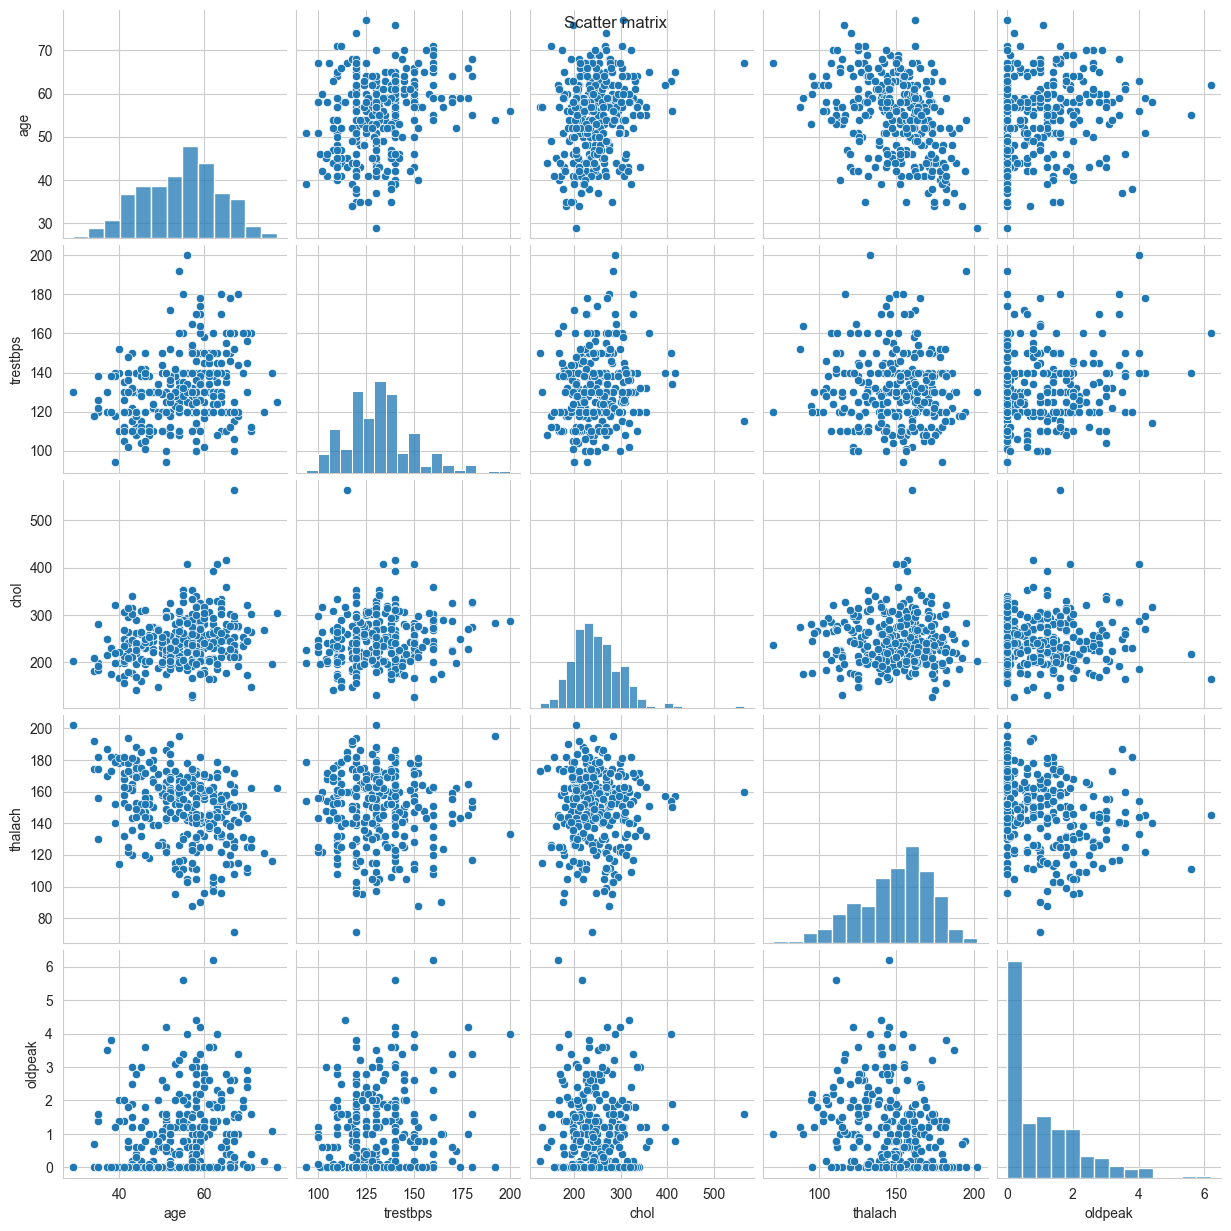

In [10]:
# Matriz de dispersión
scatter_matrix = sns.pairplot(df_corr, markers=['o', 's', 'D'])
plt.suptitle('Scatter matrix')
plt.show()

Text(0.5, 1.0, 'Matriz de correlación')

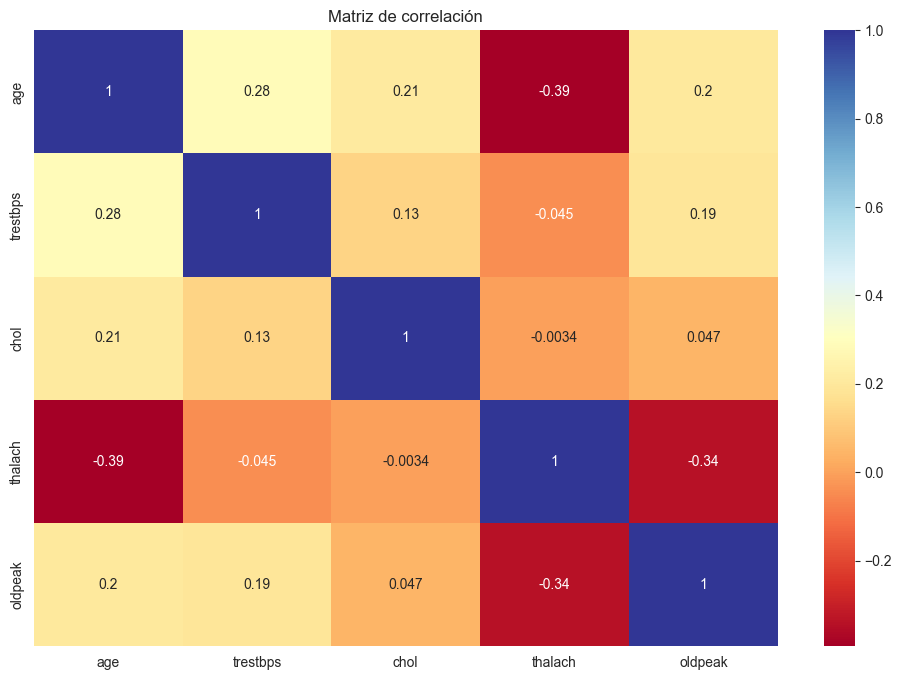

In [11]:
# Matriz de correlación
correlation_matrix = df_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Matriz de correlación')

### Interpretación de la matriz de correlación

La matriz de correlación muestra la relación entre las variables del dataset.
Par aeste dataset se puede observar que hay una correlación negativa mas elevada para thalach y oldpeak, y una correlación positiva mas elevada para trestbps y age.

# Modelos de aprendizaje no supervisado

## K-means

Con este método lo que buscamos realizar es agrupar los datos en k clusters que en este caso serían nuestros grupos que encontraremos.
La parte importante para este modelo es el no saber en cuantos grupos tenemos que clasificar los datos, ya que esto es la respuesta que nos va a arrojar el modelo.

Para este modelo se busca implementar el método del codo para encontrar el número de clusters óptimo.
Con este valor, automáticamente se va a realizar el modelo de k-means.

### Preparación de los datos

In [12]:
# Crear una copia del dataset
df_k_means = df.copy()

# Eliminar las variables categóricas
df_k_means.drop(['sex', 'fbs', 'restecg', 'exang', 'cp', 'slope'], axis=1, inplace=True)

In [13]:
# Normalizar los datos
df_k_means = StandardScaler().fit_transform(df_k_means)
df_k_means = pd.DataFrame(df_k_means, columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

### Paso 1: Método del codo

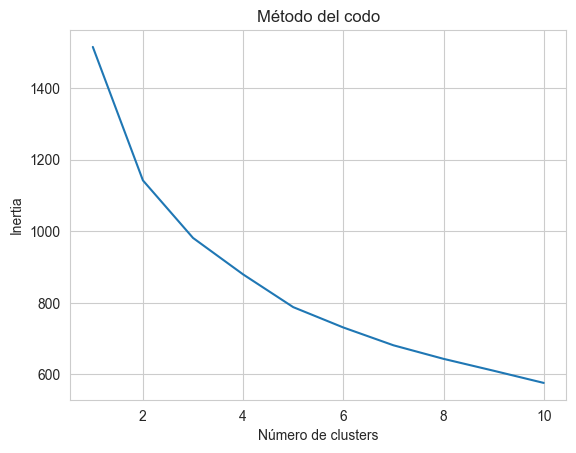

In [14]:
# Lista para guardar la inercia
inertia = []

# Realizar el método del codo
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_k_means)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
# Guardar el número óptimo de clusters y mostrarlo
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
print(f'El número óptimo de clusters es {kl.elbow}')

El número óptimo de clusters es 3


### Paso 2: Búsqueda de hiperparámetros y mejor modelo (opcional)

Este paso es opcional, y solo se ejecutará si la variable `k_means_enable_grid_search` es True.
Esto se hace para evitar que el modelo tarde mucho tiempo en ejecutarse.
El resultado final del modelo será obtenido a partir de este paso si se ejecuta.

(Nota: Este paso puede tardar mucho tiempo en ejecutarse. Durante las pruebas tardo aproximadamente 5 minutos en ejecutarse.)

In [16]:
k_means_enable_grid_search = True

# Grid de hiperparámetros
grid = {
    'n_clusters': list(range(2, 11)),
    'init': ['k-means++', 'random'],
    'max_iter': list(range(100, 901, 100)),
    'n_init': [5, 10, 15, 20, 25, 30],
    'random_state': [0]
}

# Inicializar Grid Search
grid_search = GridSearchCV(estimator=KMeans(),
                           param_grid=grid,
                           cv=5)

if k_means_enable_grid_search:
    # Entrenar Grid Search
    grid_search.fit(df_k_means)

    # Mostrar los mejores hiperparámetros
    print(f'Los mejores hiperparámetros son: {grid_search.best_params_}')
else:
    print('La búsqueda de hiperparámetros está deshabilitada.')

Los mejores hiperparámetros son: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 10, 'n_init': 25, 'random_state': 0}


A pesar de poder tener un resultado diferente en el número de clusters,
se crearán dos modelos con los dos resultados obtenidos.
Esto con el fin de comparar los resultados y ver cuál es el mejor.

### Paso 3: Crear los modelos

In [17]:
if not k_means_enable_grid_search:
    # Crear el modelo con el número óptimo de clusters
    kmeans = KMeans(n_clusters=kl.elbow,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)

    # Entrenar el modelo
    kmeans.fit(df_k_means)

    # Añadir las predicciones al dataset
    df_k_means['cluster'] = kmeans.predict(df_k_means)

In [18]:
# Crear el modelo con hiperparámetros óptimos
if k_means_enable_grid_search:
    kmeans_best = KMeans(n_clusters=grid_search.best_params_['n_clusters'],
                         init=grid_search.best_params_['init'],
                         max_iter=grid_search.best_params_['max_iter'],
                         n_init=grid_search.best_params_['n_init'],
                         random_state=grid_search.best_params_['random_state'])

    # Entrenar el modelo
    kmeans_best.fit(df_k_means)

    # Añadir las predicciones al dataset
    df_k_means['cluster'] = kmeans_best.predict(df_k_means)

In [19]:
# Mostrar los resultados
df_k_means.head()

,age,trestbps,chol,thalach,oldpeak,cluster
0,0.948726,0.757525,-0.264900,0.017197,1.087338,7
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,7
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,9
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,9


### Paso 4: Visualización de los resultados

A continuación se muestra la visualización de los resultados obtenidos.
En la primera grafica se muestra la relación entre dos variables.
Para cambiar las variables, se debe cambiar el valor de las variables `k_means_target_1` y `k_means_target_2`.

En el segundo gráfico se muestra una matriz de dispersión con las variables `age`, `trestbps`, `chol`, `thalach` y `oldpeak` coloreadas según el cluster al que pertenecen.

In [20]:
# Cambiar estas variables para ver la relación entre otras dos variables
k_means_target_1 = 'age'
k_means_target_2 = 'trestbps'

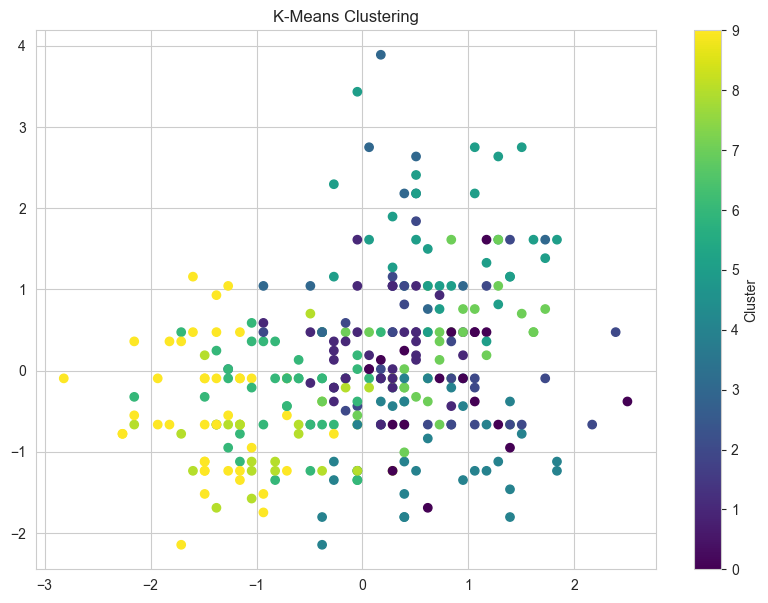

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(df_k_means[k_means_target_1], df_k_means[k_means_target_2], c=df_k_means['cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering')

plt.show()

<Figure size 1200x800 with 0 Axes>

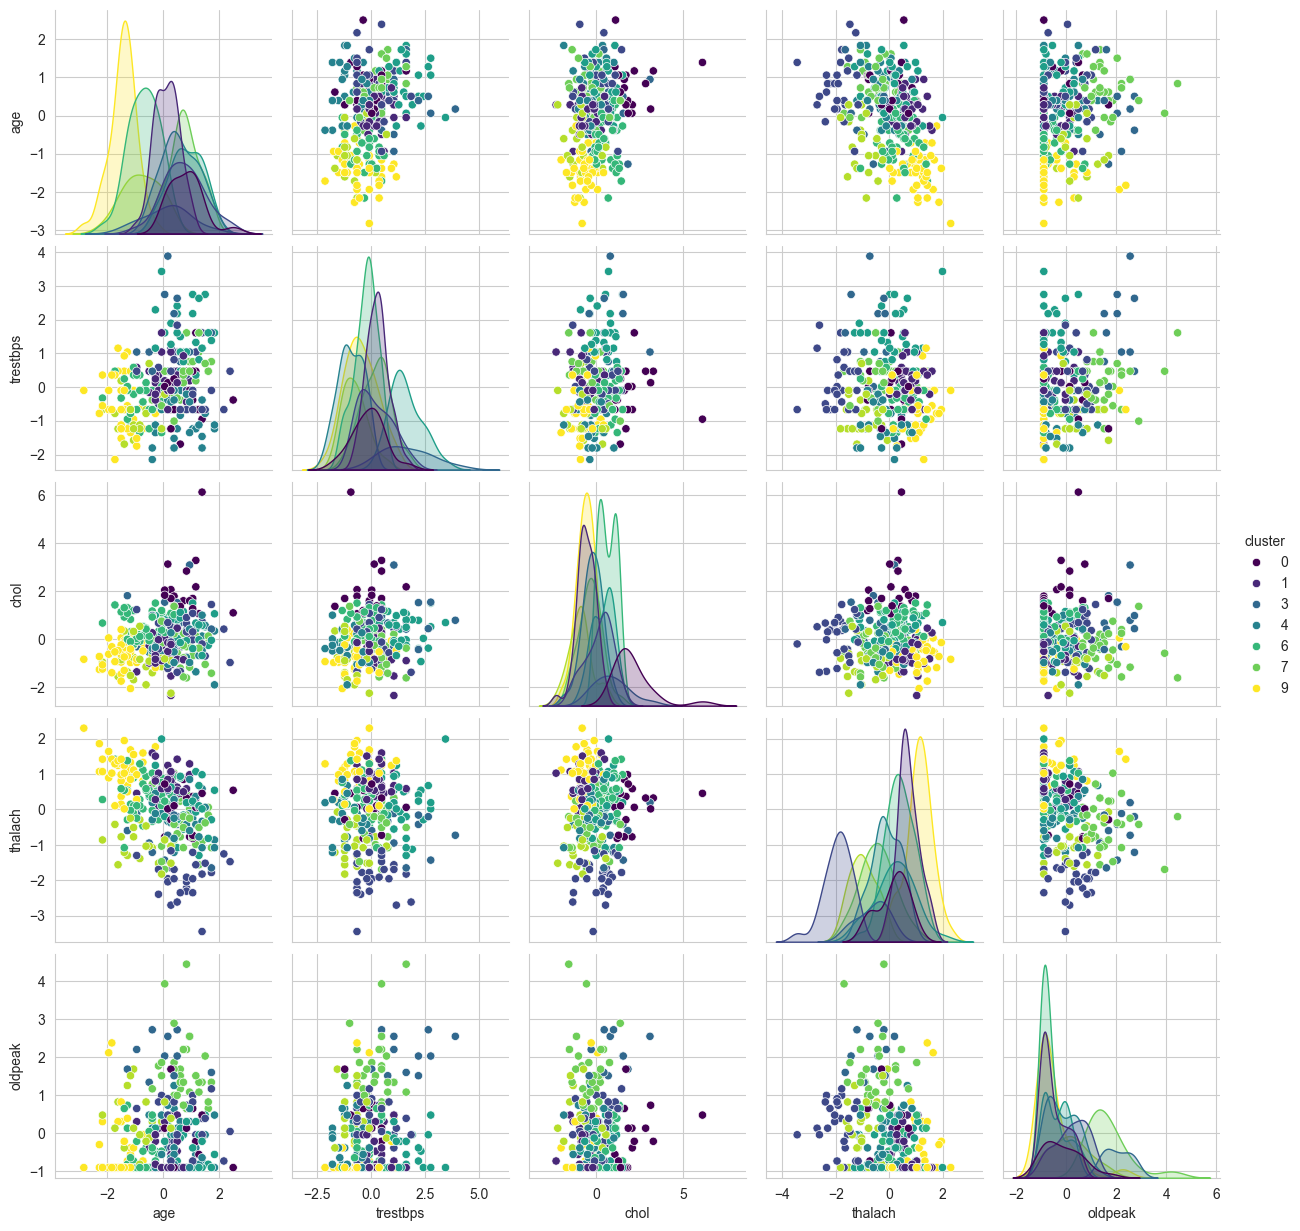

In [22]:
plt.figure(figsize=(12, 8))
sns.pairplot(df_k_means, hue='cluster', palette='viridis')

plt.show()

En los anteriores gráficos se puede observar la relación entre las variables y los clusters obtenidos.
El método de k-means nos permite ver la relación entre las variables y los clusters obtenidos.

## Clustering espectral

El agrupamiento espectral es una técnica popular en el aprendizaje automático y análisis de datos para agrupar puntos de datos basados en las relaciones o similitudes entre ellos. Aplica el espectro de una matriz de similitud para particionar los datos en grupos. El agrupamiento espectral puede ser particularmente útil para datos que no tienen una separación lineal clara.

### Preparación de los datos

In [23]:
# Crear una copia del dataset
df_spectral = df.copy()

# Eliminar las variables categóricas
df_spectral.drop(['sex', 'fbs', 'restecg', 'exang', 'cp', 'slope'], axis=1, inplace=True)

In [24]:
# Normalizar los datos
df_spectral = StandardScaler().fit_transform(df_spectral)
df_spectral = pd.DataFrame(df_spectral, columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

### Paso 1: Búsqueda de hiperparámetros y mejor modelo (opcional)

Similar al modelo de k-means, se busca el número óptimo de clusters y se realiza una búsqueda de hiperparámetros.
Este paso es opcional y se ejecutará si la variable `spectral_enable_grid_search` es True.
El resultado final del modelo será obtenido a partir de este paso si se ejecuta.

In [25]:
spectral_enable_grid_search = True

# Grid de hiperparámetros
grid = {
    'n_clusters': list(range(2, 11)),
    'affinity': ['nearest_neighbors', 'rbf'],
    'n_neighbors': list(range(2, 11)),
    'random_state': [0]
}

# Crear el scorer
spectral_silhouette_score = make_scorer(silhouette_score)

# Inicializar Grid Search
grid_search = GridSearchCV(estimator=SpectralClustering(),
                           param_grid=grid,
                           scoring=spectral_silhouette_score,
                           cv=5)

if spectral_enable_grid_search:
    # Entrenar Grid Search
    grid_search.fit(df_spectral)

    # Mostrar los mejores hiperparámetros
    print(f'Los mejores hiperparámetros son: {grid_search.best_params_}')
else:
    print('La búsqueda de hiperparámetros está deshabilitada.')

Los mejores hiperparámetros son: {'affinity': 'nearest_neighbors', 'n_clusters': 2, 'n_neighbors': 2, 'random_state': 0}


### Paso 2: Crear el modelo

In [26]:
# Esta variable determinar el número de clusters
# En caso de haber usado el paso 1, esto se ignorará
n_clusters = 2

if not spectral_enable_grid_search:
    # Crear el modelo
    spectral = SpectralClustering(n_clusters=n_clusters,
                                  affinity='nearest_neighbors',
                                  n_neighbors=7,
                                  random_state=0)

    # Añadir las predicciones al dataset
    df_spectral['cluster'] = spectral.fit_predict(df_spectral)

In [27]:
# Crear el modelo con hiperparámetros óptimos
if spectral_enable_grid_search:
    spectral_best = SpectralClustering(n_clusters=grid_search.best_params_['n_clusters'],
                                       affinity=grid_search.best_params_['affinity'],
                                       n_neighbors=grid_search.best_params_['n_neighbors'],
                                       random_state=grid_search.best_params_['random_state'])

    # Entrenar el modelo
    spectral_best.fit(df_spectral)

    # Añadir las predicciones al dataset
    df_spectral['cluster'] = spectral_best.fit_predict(df_spectral)

In [28]:
# Mostrar los resultados
df_spectral.head()

,age,trestbps,chol,thalach,oldpeak,cluster
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,1
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,1


### Paso 3: Visualización de los resultados

Nuevamente, se muestra la visualización de los resultados obtenidos,
de la misma manera que se hizo con el modelo de k-means.

In [29]:
# Cambiar estas variables para ver la relación entre otras dos variables
spectral_target_1 = 'age'
spectral_target_2 = 'trestbps'

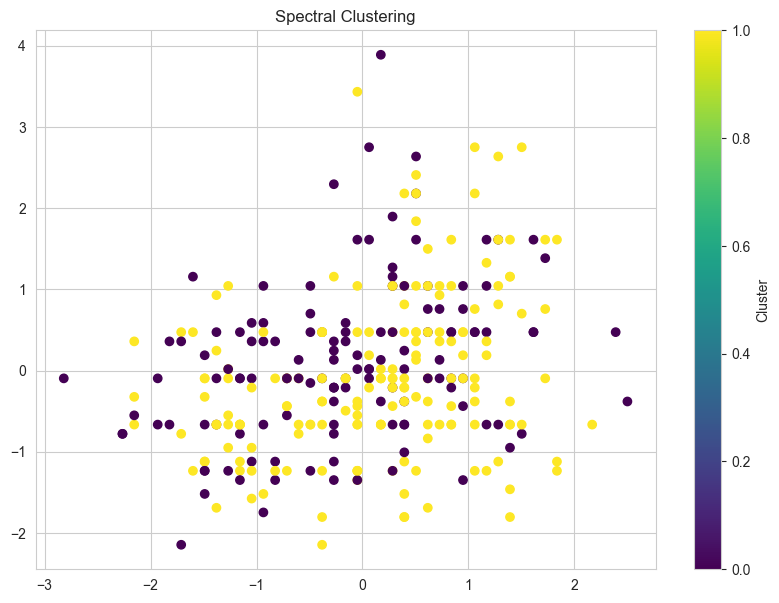

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(df_spectral[spectral_target_1], df_spectral[spectral_target_2], c=df_spectral['cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('Spectral Clustering')

plt.show()

<Figure size 1200x800 with 0 Axes>

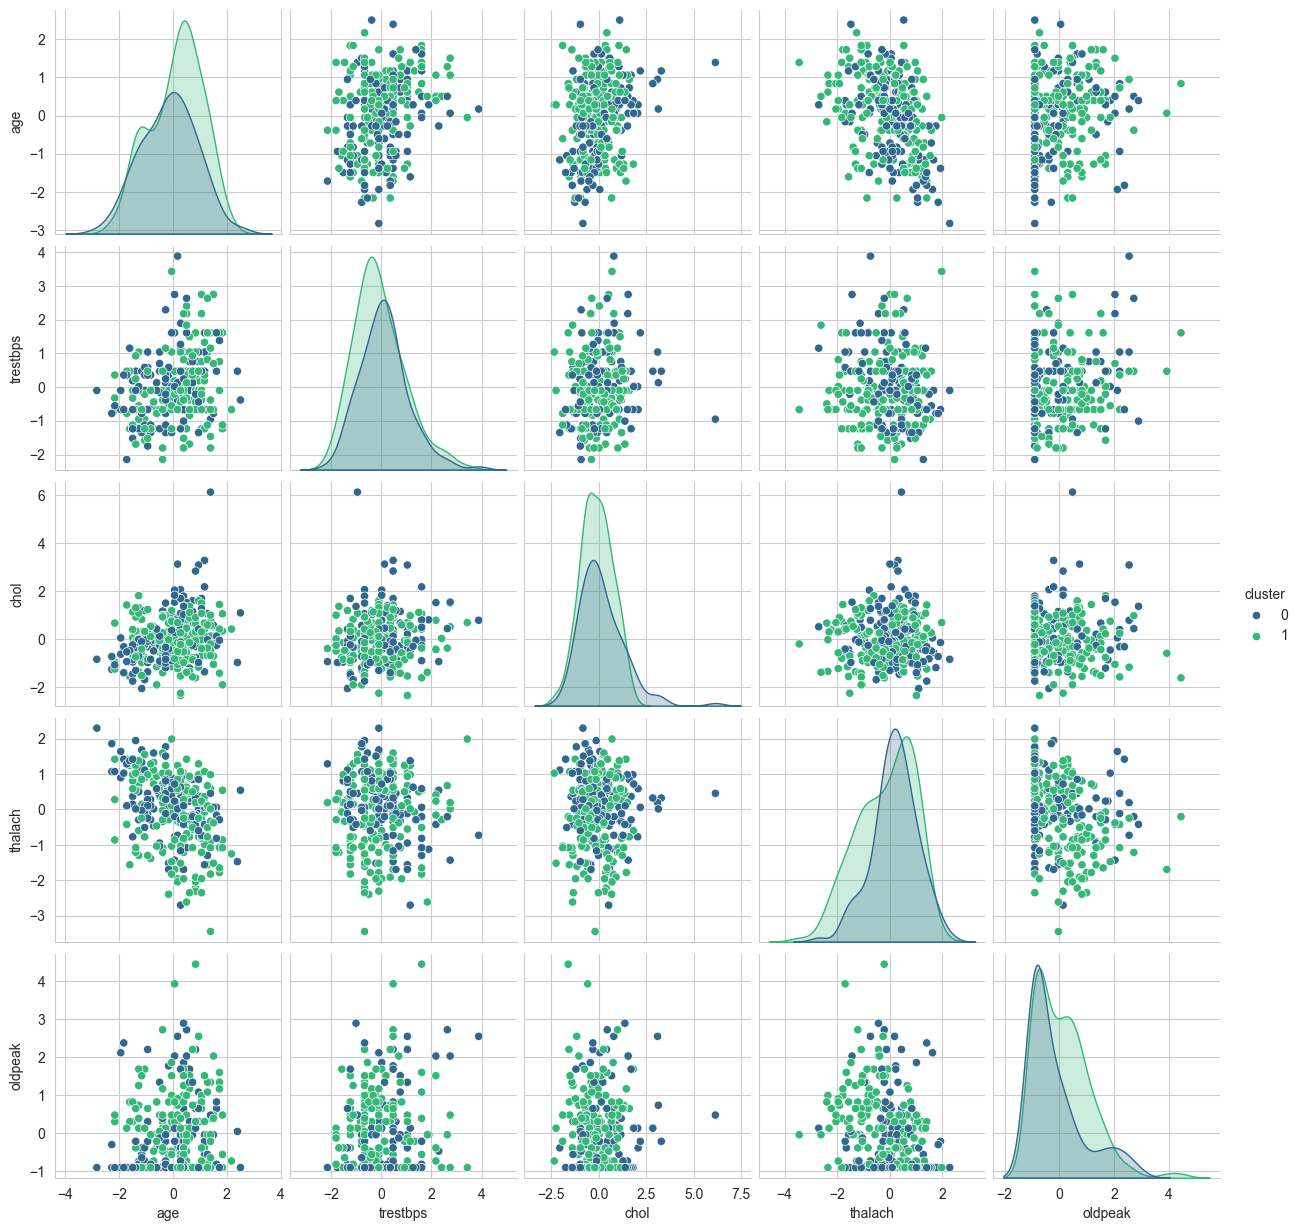

In [31]:
plt.figure(figsize=(12, 8))
sns.pairplot(df_spectral, hue='cluster', palette='viridis')

plt.show()

## Scoring del modelo usando silhouette score

In [32]:
# Calcular el silhouette score para ambos modelos
k_means_silhouette_score = silhouette_score(df_k_means.drop(columns='cluster'), df_k_means['cluster'])
spectral_silhouette_score = silhouette_score(df_spectral.drop(columns='cluster'), df_spectral['cluster'])

# Mostrar los resultados
print(f'El silhouette score para el modelo de k-means es {k_means_silhouette_score}')
print(f'El silhouette score para el modelo de clustering espectral es {spectral_silhouette_score}')

El silhouette score para el modelo de k-means es 0.17708460960356312
El silhouette score para el modelo de clustering espectral es 0.01806655646382366


Nota final: El modelo produce un mejor score cuando *no* se usa la búsqueda de hiperparámetros.
Sin embargo, decidimos dejar la búsqueda activada para demostrar el proceso.
Para desactivar la búsqueda de hiperparámetros, 
cambie el valor de la variable `k_means_enable_grid_search` a False y `spectral_enable_grid_search` a False.